Initializing API Setup and Data Fetch

In [28]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'c5c7a833-157a-47cc-8ef7-d2c90024cf00',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-12-20T22:23:10.952Z', 'error_code': 0, 'error_message': None, 'elapsed': 29, 'credit_count': 1, 'notice': None, 'total_count': 10429}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11849, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

Configuring pandas to show all columns and rows

In [29]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Creating initial DataFrame

In [30]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp']= pd.to_datetime('now')
#df

API Runner Function

In [31]:
def api_runner():

    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
    }
    headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': 'c5c7a833-157a-47cc-8ef7-d2c90024cf00',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)


    df = pd.json_normalize(data['data'])
    df['timestamp']= pd.to_datetime('now')
    df


    if not os.path.isfile(r'C:\Users\Cole\Documents\API.csv'):
        df.to_csv(r'C:\Users\Cole\Documents\API.csv', header='column_names')
    else:
        df.to_csv(r'C:\Users\Cole\Documents\API.csv', mode='a', header=False)

Run API calls with delay

In [32]:
import os
from time import time
from time import sleep

#for i in range(333): #running max 333 times as per coinmarket's api limit
for i in range(3): #running 3 times for sample
    api_runner()
    print("API Runner Completed Successfully")
    sleep(60) #sleep for 1 minute
exit

API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully


In [33]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [34]:
df3 = pd.read_csv(r'C:\Users\Cole\Documents\API.csv')
#df3

In [35]:
df4 = df3.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
#df4

In [36]:
df5 = df4.stack()
#df5

In [37]:
df6 = df5.to_frame(name='values')
#df6

In [38]:
df6.count()

values    90
dtype: int64

In [39]:
index = pd.Index(range(90))

df7 = df6.reset_index()
#df7 = df6.set_index(index)
#df7

In [40]:
df8 = df7.rename(columns={'level_1': "percent_change"})
#df8

In [41]:
df8['percent_change'] = df8['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df8

,name,percent_change,values
0,Bitcoin,1h,0.49552
1,Bitcoin,24h,-0.14725
2,Bitcoin,7d,-4.47962
3,Bitcoin,30d,2.50864
4,Bitcoin,60d,42.92113
5,Bitcoin,90d,53.33846
6,Ethereum,1h,0.64852
7,Ethereum,24h,1.69065
8,Ethereum,7d,-11.55709
9,Ethereum,30d,12.06293


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

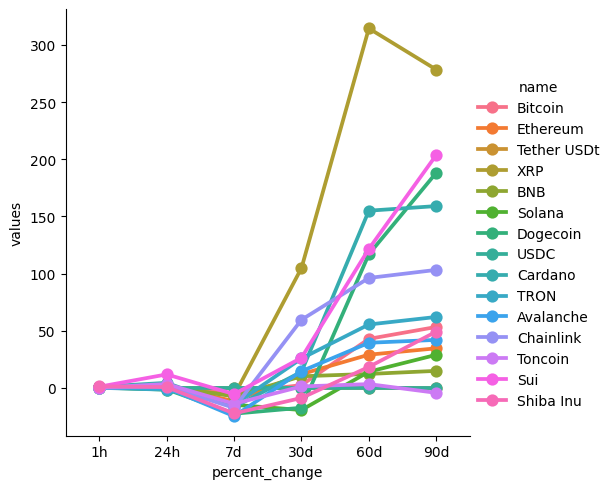

In [43]:
sns.catplot(x='percent_change', y='values', hue='name', data=df8, kind='point')

In [44]:
df9 = df3[['name', 'quote.USD.price', 'timestamp']]
df9 = df9.query("name == 'Bitcoin'")
df9

,name,quote.USD.price,timestamp
0,Bitcoin,96738.68362,2024-12-20 14:39:08.619029
15,Bitcoin,96710.61188,2024-12-20 14:40:09.098509
30,Bitcoin,96710.61188,2024-12-20 14:41:09.460468
45,Bitcoin,96760.09253,2024-12-20 16:12:31.539188
60,Bitcoin,96716.88595,2024-12-20 16:13:31.908211
75,Bitcoin,96718.06680,2024-12-20 16:14:32.284719
90,Bitcoin,97020.27337,2024-12-20 16:23:09.853816
105,Bitcoin,97087.45531,2024-12-20 16:24:10.233285
120,Bitcoin,97106.69360,2024-12-20 16:25:11.507971


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

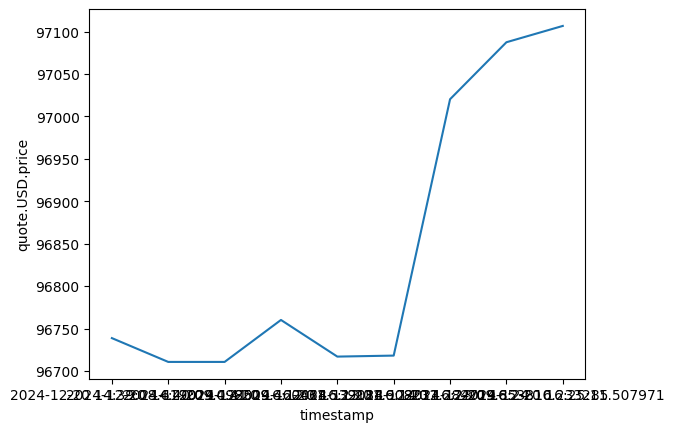

In [45]:
sns.lineplot(x='timestamp', y='quote.USD.price', data=df9)